In [1301]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats.stats import pearsonr

In [1302]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

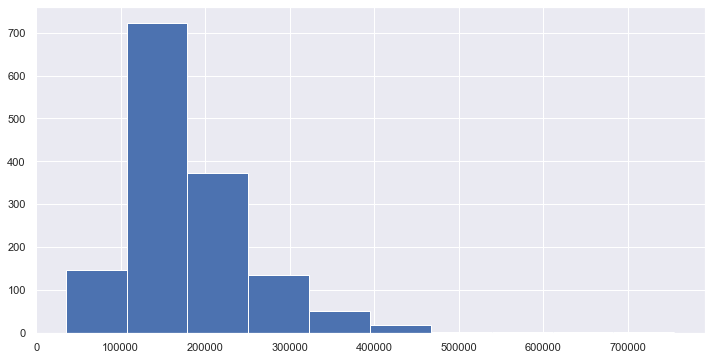

In [1303]:
train["SalePrice"].hist()
#Clearly the Data is skewed (positively skewed)

In [1304]:
#Skewness and Kurtosis of SalePrice:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


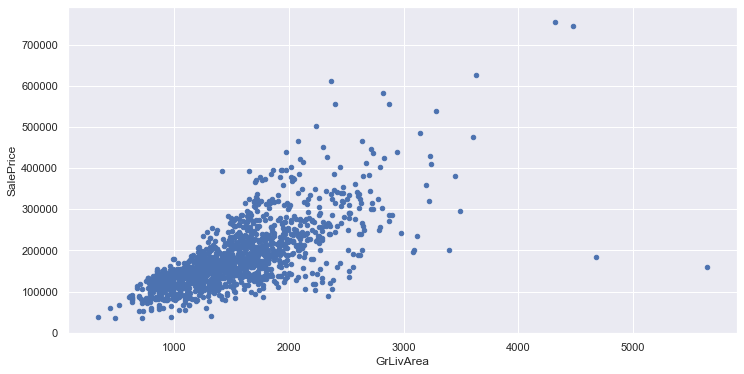

In [1305]:
#Scatter plot with grLivarea / saleprice

var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')

#Conclusion:- Linear Relationship

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


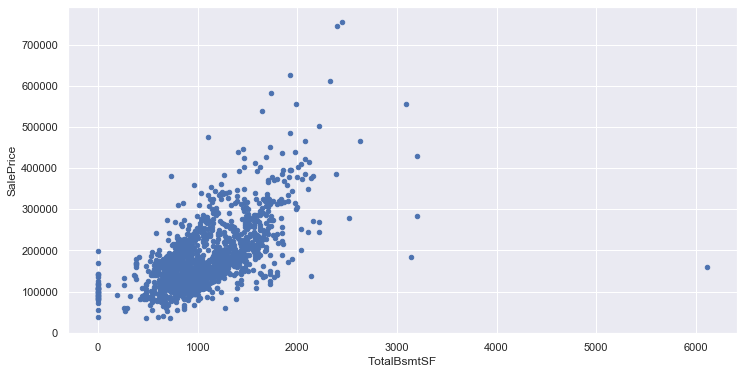

In [1306]:
#Scatter plot with totalbsmtsf / saleprice

var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')

#Conclusion:- Non-Linear Relationship

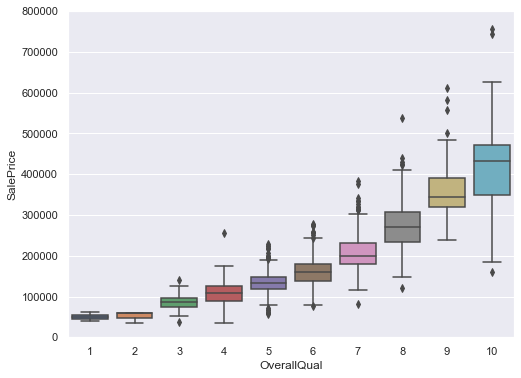

In [1307]:
#Scatter plot with OverallQual / saleprice

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000);

#Conclusion:- As OverallQual increases, Sale Price increases (Linear maybe?)

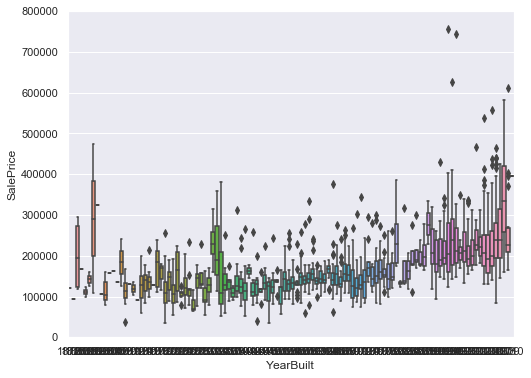

In [1308]:
#Scatter plot with YearBuilt / saleprice

var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(x = var, y = "SalePrice", data = data)
fig.axis(ymin = 0, ymax = 800000);

#Conclusion:- No definite Pattern

#We have only shown 4 features, but you should try with every feature that seems
#relevant

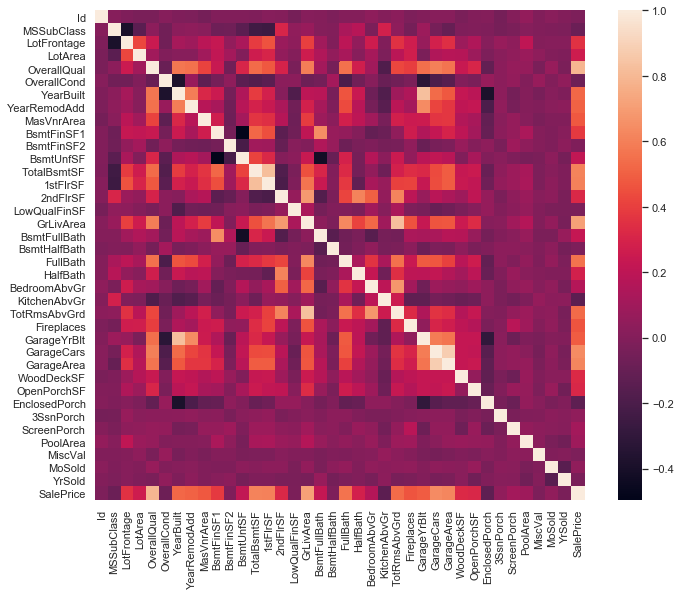

In [1309]:
corrmat = train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, square = True)

#Heatmap is the best way to get correlated variables at first
#TotalBsmtSF and 1stFlrSF should grab your attention at first
#Also, notice the garageX variables

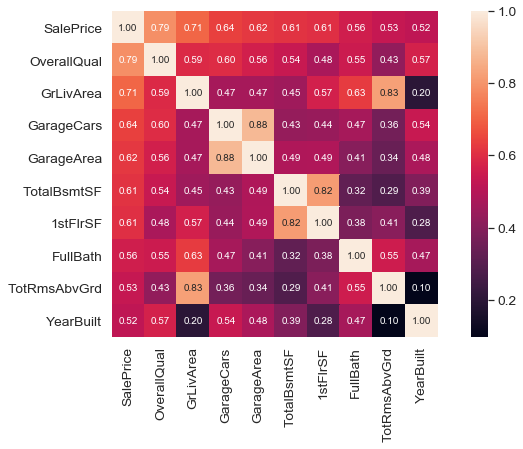

In [1310]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#OverallQual, GrlIvArea and TotalBSMTSf are strongly related with 'SalePrice'
#GarageCars and GarageArea are strongly related
#TotalBSMT and 1stFlrSf as well

C:\Users\Aaryan Sood\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


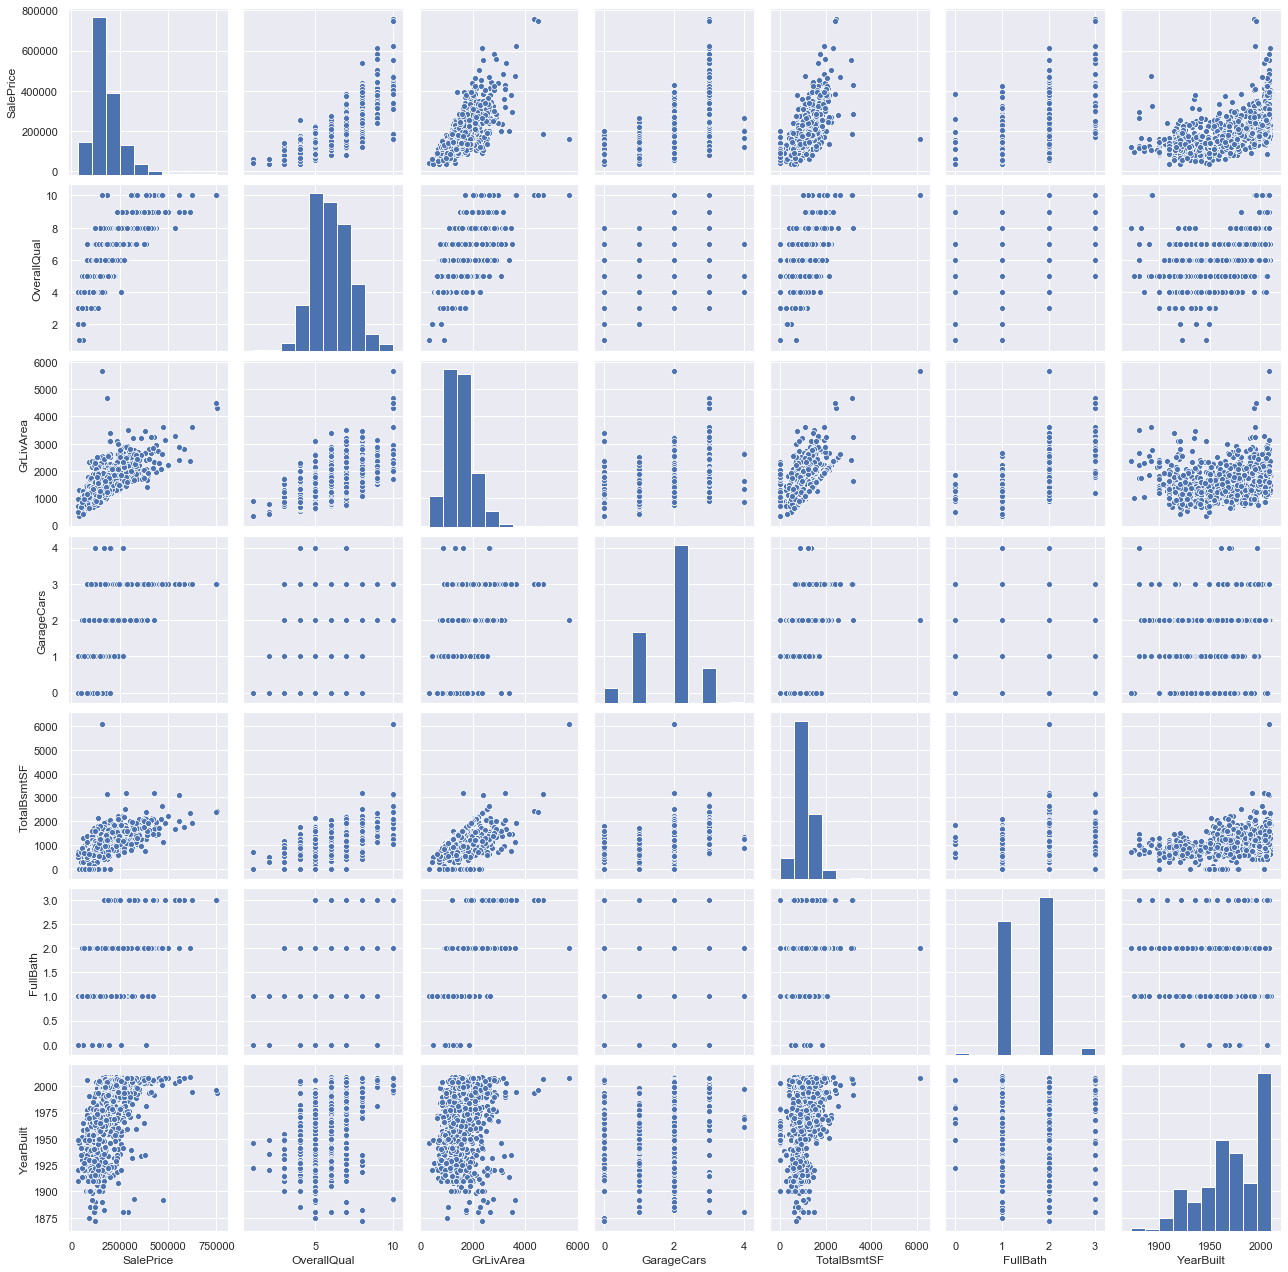

In [1311]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF',
       'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal  \
1298         Bnk    AllPub  ...      480     Gd   NaN         NaN       0   
523          Bnk    AllPub  ...        0    NaN   NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298      1   2008       New        Partial     160000  
523      10   2007       New        Partial     184750  

[2 rows x 81 columns]


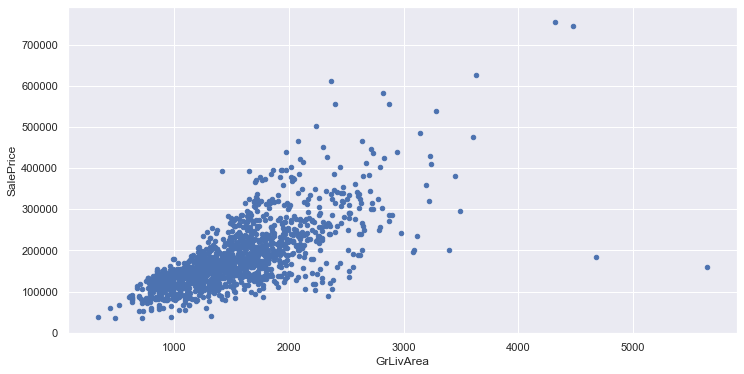

In [1312]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis = 1)
data.plot.scatter(x = var, y = 'SalePrice')

#The two bigger GrLivArea value does not seem to follow the crowd. We will 
#regard them as outliers and delete 'em.

print(train.sort_values(by = var, ascending = False)[: 2])


In [1313]:
train = train.drop(train[train['Id'] == 1299].index)
train = train.drop(train[train['Id'] == 524].index)

'''See how the salePrice complies with the Statistical Assumptions:-
1) Normality of the Data:- Important because several statistical tests rely
on this very basic assumption
2) Homoscedasticity:- This assumption states constant variance of the dependent
variable across the range of predictor variables (or error term is same)
3) Linearity!!!!! - ScatterPlots should be fairly linear or residual plots
should not have any pattern
'''

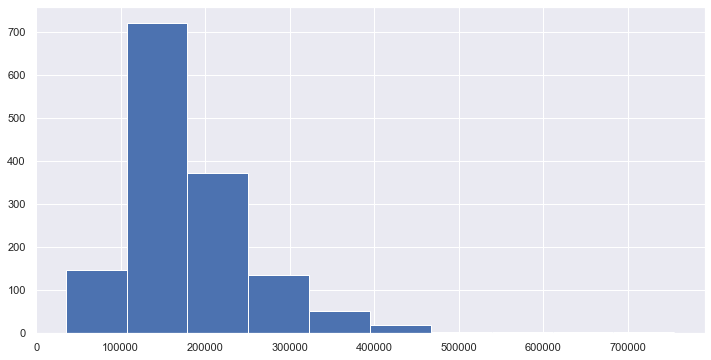

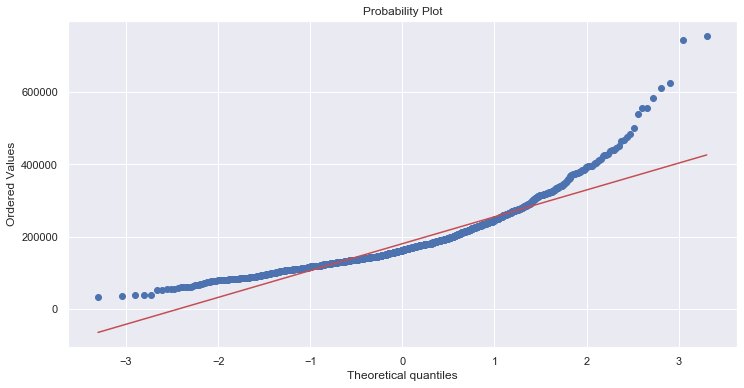

In [1314]:
import scipy.stats

train['SalePrice'].hist()
#We can also use probability plots to validate the same
fig = plt.figure()
res = scipy.stats.probplot(train['SalePrice'], plot = plt)

In [1315]:
train['SalePrice'] = np.log1p(train['SalePrice'])

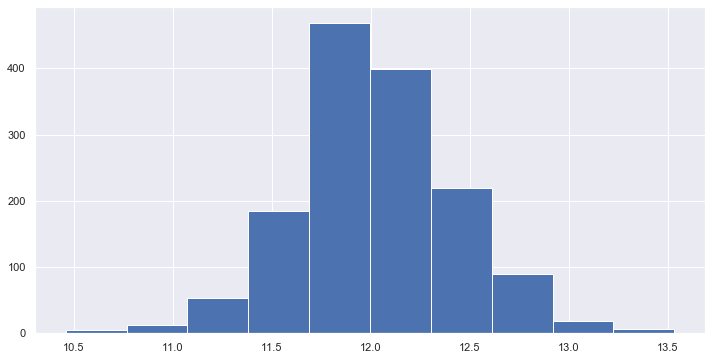

In [1316]:
train['SalePrice'].hist()

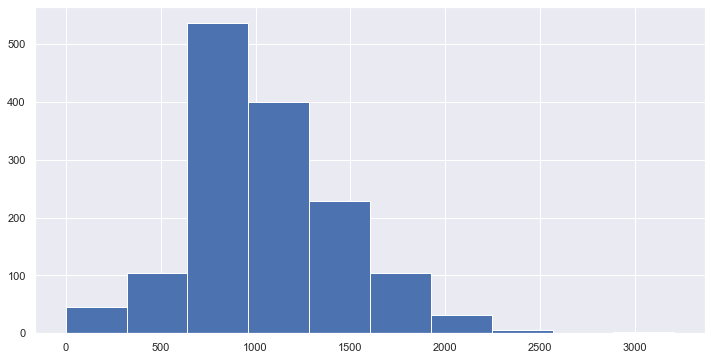

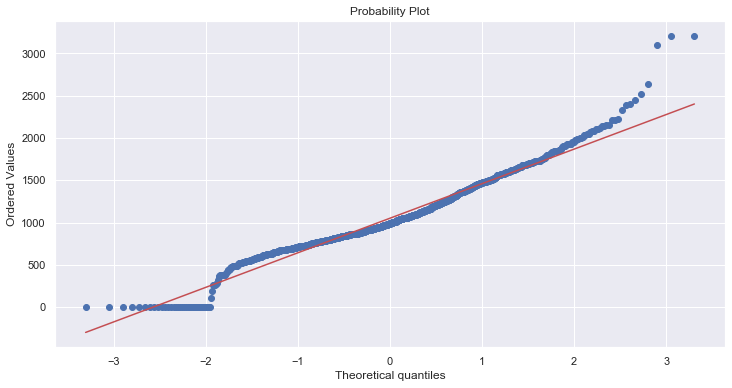

In [1317]:
train['TotalBsmtSF'].hist()
fig = plt.figure()
res = scipy.stats.probplot(train['TotalBsmtSF'], plot = plt)

#PLease refer below to get why we considered this variable in particular

In [1318]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


In [1319]:
train = train.drop((missing_data[missing_data['Total'] > 1]).index,1)
test = test.drop((missing_data[missing_data['Total'] > 1]).index,1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
#test = test.drop(test.loc[test['Electrical'].isnull()].index)
train.isnull().sum().max()

0

In [1320]:
y_train = train['SalePrice'].to_numpy()
train = train.drop('SalePrice', axis = 1)
all_data = pd.concat((train.loc[:, 'MSSubClass':'SaleCondition'],
                     test.loc[:, 'MSSubClass':'SaleCondition']))

In [1321]:
numeric_feats = all_data.dtypes[train.dtypes != "object"].index

skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x)) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [1323]:
all_data = pd.get_dummies(all_data)

In [1324]:
train = all_data[:1457]
test = all_data[1457:]
test = test.fillna(test.mean())

In [1325]:
test.info()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 219 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(22), int64(11), uint8(186)
memory usage: 652.6 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 219 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(22), int64(11), uint8(186)
memory usage: 651.7 KB


In [1326]:
y_train

array([12.24769912, 12.10901644, 12.31717117, ..., 12.49313327,
       11.86446927, 11.90159023])

In [1327]:
X_train = train.to_numpy()
print(X_train)

X_test = test.to_numpy()
X_test

[[4.11087386 9.04204006 7.         ... 0.         1.         0.        ]
 [3.04452244 9.16962254 6.         ... 0.         1.         0.        ]
 [4.11087386 9.32821229 7.         ... 0.         1.         0.        ]
 ...
 [4.26267988 9.10974626 7.         ... 0.         1.         0.        ]
 [3.04452244 9.18173511 5.         ... 0.         1.         0.        ]
 [3.04452244 9.20412107 5.         ... 0.         1.         0.        ]]


array([[3.04452244, 9.36074117, 5.        , ..., 0.        , 1.        ,
        0.        ],
       [3.04452244, 9.56577455, 6.        , ..., 0.        , 1.        ,
        0.        ],
       [4.11087386, 9.53466773, 5.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [3.04452244, 9.90353755, 5.        , ..., 0.        , 0.        ,
        0.        ],
       [4.4543473 , 9.25359141, 5.        , ..., 0.        , 1.        ,
        0.        ],
       [4.11087386, 9.1724308 , 7.        , ..., 0.        , 1.        ,
        0.        ]])

In [1328]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
#X

In [1329]:
print(y_train.shape)
X_train.shape

(1457,)


(1457, 219)

In [1330]:
from sklearn.linear_model import LinearRegression

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Let's now verify some assumptions

In [1331]:
linear_r2 = regr.score(X_train, y_train)

In [1332]:
print("R^2: {0}".format(linear_r2))

R^2: 0.94536846919979


In [1333]:
def calculate_residuals(model, feature, label):
    predictions = model.predict(feature)
    df_results = pd.DataFrame({'Actual': label, 'Predicted' : predictions})
    df_results['Residuals'] = abs(df_results['Actual'] - abs(df_results['Predicted']))
    
    return df_results

In [1334]:
df_results_simpleLinearRegression = calculate_residuals(regr, X_train, y_train)

In [1335]:
def linear_assumption(model, feature, label):
    print("Assumption1: Checking the linear Relationship:", '\n')
    
    df_results = calculate_residuals(model, feature, label)
    
    #Plotting actual vs predicted values
    sns.lmplot(x = 'Actual', y = 'Predicted', data = df_results, size = 7)
    
    plt.title('Actual vs. Predicted')
    plt.show()

Assumption1: Checking the linear Relationship: 



C:\Users\Aaryan Sood\anaconda3\lib\site-packages\seaborn\regression.py:574: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


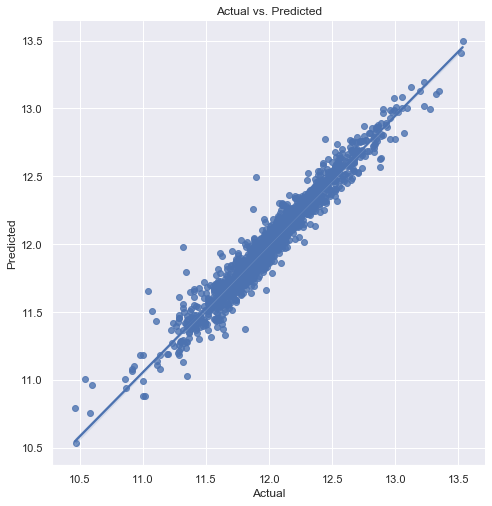

In [1336]:
linear_assumption(regr, X_train, y_train)

#The Train Data does not follow a linear relationship. It seems that
#it is fitting the data quite well which maybe a source of variance

In [1337]:
def homoscedasticity_assumption(model, feature, label):
    print("Assumption: Constant variance of Error Terms: ", '\n')
    df_results = calculate_residuals(model, feature, label)
    
    plt.subplots(figsize = (12, 6))
    ax = plt.subplot(111)
    plt.scatter(x = df_results.index, y = df_results.Residuals)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.title('Residuals')
    plt.show() 

Assumption: Constant variance of Error Terms:  



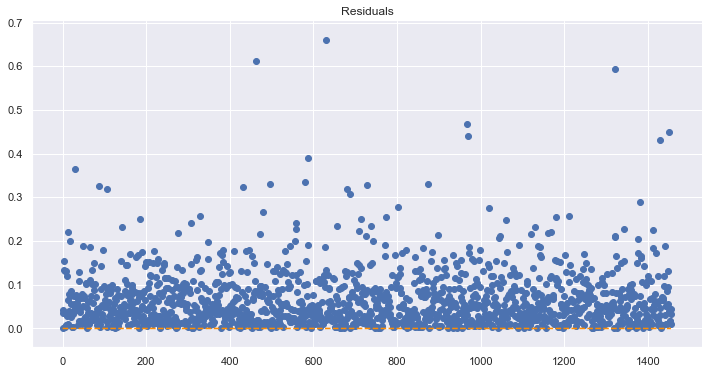

In [1338]:
homoscedasticity_assumption(regr, X_train, y_train)

#One can clearly see that this assumption is being violated

In [1339]:
def normal_errors_assumption(model, features, label, p_value_thresh=0.05):
    
    from statsmodels.stats.diagnostic import normal_ad
    print('Assumption 2: The error terms are normally distributed', '\n')
    
    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(12, 6))
    plt.title('Distribution of Residuals')
    sns.distplot(df_results['Residuals'])
    plt.show()
    

Assumption 2: The error terms are normally distributed 



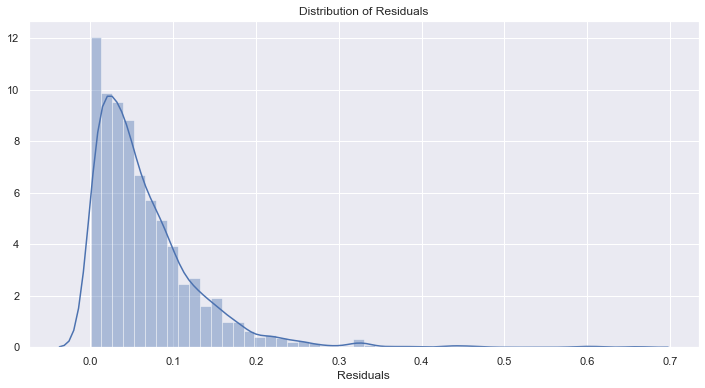

In [1340]:
normal_errors_assumption(regr, X_train, y_train)

#Clearly the assumption is not satisfied

In [1341]:
def multicollinearity_assumption(model, features, label, feature_names=None):
    
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    print('Assumption 3: Little to no multicollinearity among predictors')
             
    print('Variance Inflation Factors (VIF)')
    print('> 10: An indication that multicollinearity may be present')
    print('> 100: Certain multicollinearity among the variables')
    print('-------------------------------------')
       
    # Gathering the VIF for each variable
    VIF = [variance_inflation_factor(features, i) for i in range(features.shape[1])]
   
    for vif in VIF:
        print("VIF for features", vif)
        
    possible_multicollinearity = sum([1 for vif in VIF if vif > 10])
    definite_multicollinearity = sum([1 for vif in VIF if vif > 100])
    print()
    print('{0} cases of possible multicollinearity'.format(possible_multicollinearity))
    print('{0} cases of definite multicollinearity'.format(definite_multicollinearity))
    print()

    if definite_multicollinearity == 0:
        if possible_multicollinearity == 0:
            print('Assumption satisfied')
        else:
            print('Assumption possibly satisfied')
            print()
            print('Coefficient interpretability may be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')

    else:
        print('Assumption not satisfied')
        print()
        print('Coefficient interpretability will be problematic')
        print('Consider removing variables with a high Variance Inflation Factor (VIF)')

In [1342]:
multicollinearity_assumption(regr, X_train, y_train)
#Since most of the features don't satisfy these assumptions, we need to improve our dataset

Assumption 3: Little to no multicollinearity among predictors
Variance Inflation Factors (VIF)
> 10: An indication that multicollinearity may be present
> 100: Certain multicollinearity among the variables
-------------------------------------


C:\Users\Aaryan Sood\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


VIF for features 17.34677789362635
VIF for features 4.8410281991125546
VIF for features 5.0971616685925865
VIF for features 2.431353876459913
VIF for features 12.972434467466915
VIF for features 3.3482794706226926
VIF for features inf
VIF for features inf
VIF for features inf
VIF for features inf
VIF for features 26.18751035523563
VIF for features 46.850345856375654
VIF for features 2.4660997136465292
VIF for features 39.7622315871578
VIF for features 2.6318145665362103
VIF for features 1.4020341491179509
VIF for features 3.829374903305014
VIF for features 2.9934716381719393
VIF for features 3.2784965544973446
VIF for features 4.071261398004655
VIF for features 5.998486691770985
VIF for features 1.9821547455436967
VIF for features 6.976516799380396
VIF for features 6.722849721061459
VIF for features 1.4456352853244268
VIF for features 1.7855039881778654
VIF for features 1.647945092607714
VIF for features 1.2127005402968887
VIF for features 1.2549752448255147
VIF for features 1.20405202

# Let us now move on to Regularized models and see if they can help


In [1343]:
from sklearn.linear_model import RidgeCV, LassoCV, Lasso, Ridge
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

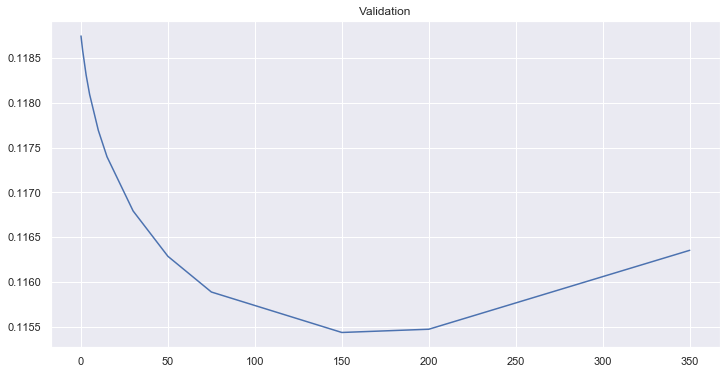

In [1344]:
model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75, 150, 200, 350]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation")

In [1345]:
model_ridge = Ridge(alpha = 150)
model_ridge.fit(X_train, y_train)

Ridge(alpha=150, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1346]:
residuals_ridge = calculate_residuals(model_ridge, X_train, y_train)

In [1347]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

In [1348]:
residuals_lasso = calculate_residuals(model_lasso, X_train, y_train)

In [1349]:
rmse_cv(model_lasso).min()

0.10229162035866797

In [1350]:
#Lasso performs even better than the ridge regression.
coef = pd.Series(model_lasso.coef_)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 155 variables and eliminated the other 64 variables


In [1351]:
linear_r2 = model_lasso.score(X_train, y_train)

In [1352]:
linear_r2

0.9437095272779614

In [1353]:
linear_r2 = model_ridge.score(X_train, y_train)

In [1354]:
linear_r2

0.9425031648583573

In [1355]:
residuals_lasso

,Actual,Predicted,Residuals
0,12.247699,12.244132,0.003568
1,12.109016,12.126048,0.017032
2,12.317171,12.281498,0.035674
3,11.849405,12.018598,0.169193
4,12.429220,12.589008,0.159788
...,...,...,...
1452,12.072547,12.089111,0.016564
1453,12.254868,12.249127,0.005741
1454,12.493133,12.533130,0.039997
1455,11.864469,11.817761,0.046708


In [1356]:
residuals_ridge

,Actual,Predicted,Residuals
0,12.247699,12.248720,0.001021
1,12.109016,12.115139,0.006123
2,12.317171,12.275048,0.042123
3,11.849405,12.018636,0.169232
4,12.429220,12.589381,0.160161
...,...,...,...
1452,12.072547,12.093117,0.020570
1453,12.254868,12.206151,0.048717
1454,12.493133,12.529084,0.035951
1455,11.864469,11.827874,0.036595


In [1357]:
df_results_simpleLinearRegression

,Actual,Predicted,Residuals
0,12.247699,12.249219,0.001520
1,12.109016,12.144727,0.035711
2,12.317171,12.274793,0.042378
3,11.849405,11.983776,0.134371
4,12.429220,12.583326,0.154106
...,...,...,...
1452,12.072547,12.090284,0.017737
1453,12.254868,12.237989,0.016879
1454,12.493133,12.538770,0.045637
1455,11.864469,11.832166,0.032303


# As one can clearly see, all of them are performing in a very good manner


In [1367]:
y_pre = model_lasso.predict(X_test)

In [1368]:
y_pre = np.expm1(y_pre)
te = pd.read_csv("test.csv")

In [1369]:
ans = pd.DataFrame({'Id': te['Id'], 'SalePrice' : y_pre})
ans

,Id,SalePrice
0,1461,122740.281255
1,1462,158822.642841
2,1463,186176.142488
3,1464,199215.918730
4,1465,203537.722822
...,...,...
1454,2915,89519.629934
1455,2916,84076.997607
1456,2917,170926.459940
1457,2918,120160.830699


In [1370]:
ans.to_csv('ans11.csv')